In [3]:
!unzip /content/brain-mri-images-for-brain-tumor-detection.zip

Archive:  /content/brain-mri-images-for-brain-tumor-detection.zip
  inflating: brain_tumor_dataset/no/1 no.jpeg  
  inflating: brain_tumor_dataset/no/10 no.jpg  
  inflating: brain_tumor_dataset/no/11 no.jpg  
  inflating: brain_tumor_dataset/no/12 no.jpg  
  inflating: brain_tumor_dataset/no/13 no.jpg  
  inflating: brain_tumor_dataset/no/14 no.jpg  
  inflating: brain_tumor_dataset/no/15 no.jpg  
  inflating: brain_tumor_dataset/no/17 no.jpg  
  inflating: brain_tumor_dataset/no/18 no.jpg  
  inflating: brain_tumor_dataset/no/19 no.jpg  
  inflating: brain_tumor_dataset/no/2 no.jpeg  
  inflating: brain_tumor_dataset/no/20 no.jpg  
  inflating: brain_tumor_dataset/no/21 no.jpg  
  inflating: brain_tumor_dataset/no/22 no.jpg  
  inflating: brain_tumor_dataset/no/23 no.jpg  
  inflating: brain_tumor_dataset/no/24 no.jpg  
  inflating: brain_tumor_dataset/no/25 no.jpg  
  inflating: brain_tumor_dataset/no/26 no.jpg  
  inflating: brain_tumor_dataset/no/27 no.jpg  
  inflating: brain_tum

In [ ]:
# Dataset Link : https://www.kaggle.com/navoneel/brain-mri-images-for-brain-tumor-detection

# **Brain Tumour Classification**

In [4]:
import os
import shutil
import warnings
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import PIL
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.applications.vgg16 import preprocess_input,VGG16
from tensorflow.keras.models import  Model, load_model
from tensorflow.keras.preprocessing import image

## Remove Warnings

In [5]:
warnings.filterwarnings("ignore")

# Visualize data

In [8]:
yestype=os.listdir('/content/brain_tumor_dataset/yes')
notype=os.listdir('/content/brain_tumor_dataset/no')

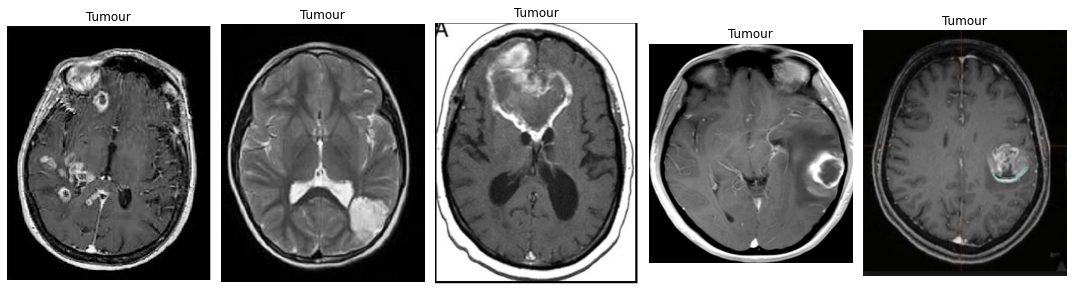

In [9]:
plt.figure(figsize=(15,15))
for i in range(5):
  plt.subplot(1,5,i+1)
  imageread=cv2.imread('/content/brain_tumor_dataset/yes/'+yestype[i])
  plt.title("Tumour")
  plt.axis('off')
  plt.imshow(imageread)
  plt.tight_layout()

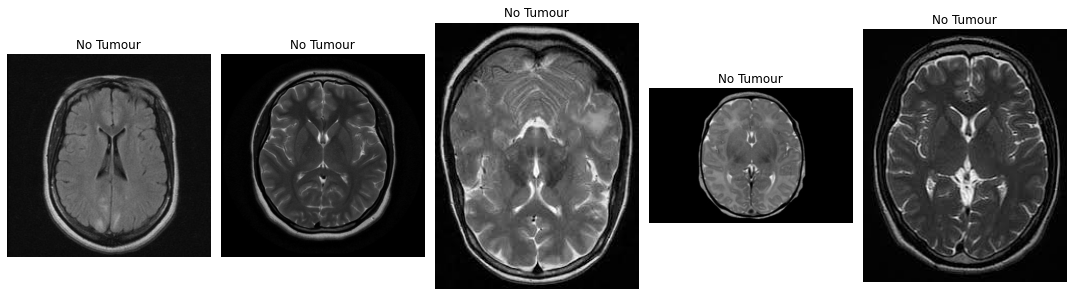

In [10]:
plt.figure(figsize=(15,15))
for i in range(5):
  plt.subplot(1,5,i+1)
  imageread=cv2.imread('/content/brain_tumor_dataset/no/'+notype[i])
  plt.title("No Tumour")
  plt.axis('off')
  plt.imshow(imageread)
  plt.tight_layout()

# Data Preprocessing (Data Augmentation)

In this, We have a dataset of brain tumour. We split the dataset in ratio of 90:10. We gave 90% data for train the model and 10% data for test the model. Because of that we use validation_split=0.1

In [23]:
# Change path according to your dataset's path
train_path = "/content/brain_tumor_dataset"

In [24]:
train_dg = ImageDataGenerator(rescale=1./255, horizontal_flip=True, vertical_flip=True,
                              shear_range=0.2, zoom_range=0.2,
                              width_shift_range=0.2, height_shift_range=0.2, validation_split=0.1)


In [25]:
batch_size=4
train = train_dg.flow_from_directory(train_path, target_size = (224,224), color_mode="rgb", class_mode = "binary", batch_size=batch_size, subset="training" )

val = train_dg.flow_from_directory(train_path, target_size = (224,224), color_mode="rgb", class_mode = "binary", batch_size=batch_size, subset="validation" )

Found 229 images belonging to 2 classes.
Found 24 images belonging to 2 classes.


In [26]:
train.class_indices

{'no': 0, 'yes': 1}

In [27]:
val.class_indices

{'no': 0, 'yes': 1}

# Implement Our own CNN Architecture

In [29]:

cnn=tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[224,224,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

# Summary of model

In [30]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 56, 56, 256)       147712    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 28, 28, 256)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 200704)           

# Compile model

In [31]:
cnn.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['accuracy'])

# Define Checkpoint

In [32]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("/content/brain_tumour.h5",
                             monitor='val_accuracy',
                             mode='max',
                             save_best_only=True,
                             verbose=1)

## Train a model

In [33]:
cnn.fit_generator(train,validation_data=val,epochs=50,
                  steps_per_epoch=train.samples//batch_size,
                  validation_steps=val.samples//batch_size, 
                  callbacks = checkpoint
                 )

Epoch 1/50
57/57 [==============================] - 5s 74ms/step - loss: 0.7732 - accuracy: 0.5867 - val_loss: 0.5990 - val_accuracy: 0.6250

Epoch 00001: val_accuracy improved from -inf to 0.62500, saving model to /content/brain_tumour.h5
Epoch 2/50
57/57 [==============================] - 4s 72ms/step - loss: 0.6510 - accuracy: 0.6444 - val_loss: 0.6099 - val_accuracy: 0.7917

Epoch 00002: val_accuracy improved from 0.62500 to 0.79167, saving model to /content/brain_tumour.h5
Epoch 3/50
57/57 [==============================] - 4s 71ms/step - loss: 0.6850 - accuracy: 0.6356 - val_loss: 0.5641 - val_accuracy: 0.6250

Epoch 00003: val_accuracy did not improve from 0.79167
Epoch 4/50
57/57 [==============================] - 4s 71ms/step - loss: 0.6542 - accuracy: 0.6133 - val_loss: 0.5305 - val_accuracy: 0.6667

Epoch 00004: val_accuracy did not improve from 0.79167
Epoch 5/50
57/57 [==============================] - 4s 70ms/step - loss: 0.6338 - accuracy: 0.6933 - val_loss: 0.5218 - val

# Load a model

In [37]:
my_model = load_model("/content/brain_tumour.h5")

## Test a model

In [40]:
def test_model(image_for_testing):
  test_image=image.load_img(image_for_testing,target_size=(224,224))
  test_image=image.img_to_array(test_image)
  test_image=test_image/255
  test_image=np.expand_dims(test_image,axis=0)
  result=my_model.predict_classes(test_image)

  Catagories=['Person has no tumour','Person has tumour']

  image_show=PIL.Image.open(image_for_testing)
  plt.imshow(image_show)

  plt.title(Catagories[int(result[0][0])])
  plt.axis("off")
  plt.show()

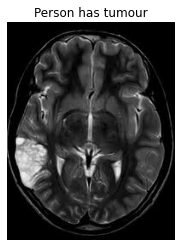

In [41]:
test_model('/content/yes/Y252.jpg')

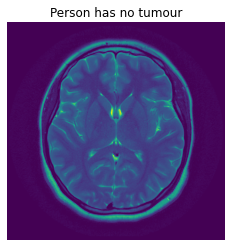

In [42]:
test_model('/content/no/no 94.jpg')

# ***THANK YOU !!!!!!!!!!!!!!***